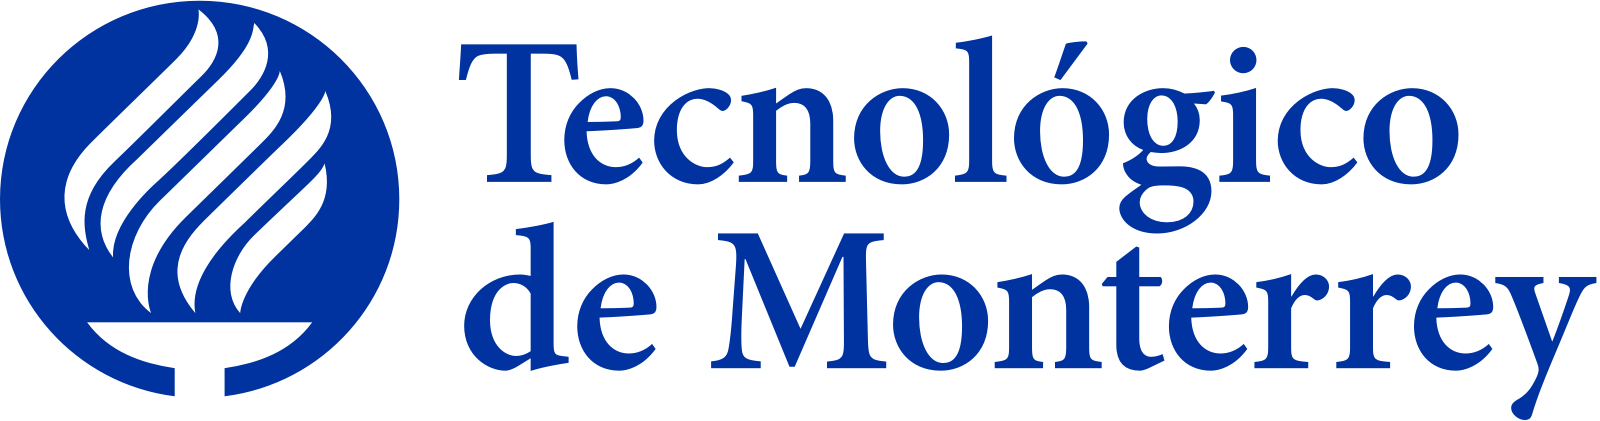

# **Reto entregable 1**
* Guillermo Villegas Morales A01637169
* Adara Luisa Pulido Sánchez A01642450
* Jorge Eduardo Guijarro Márquez A01563113
* Alan Rojas López A01706146
* Gabriel Eduardo Meléndez Zavala A01638293





# Introducción
En este entregable realizamos una fase exploratoria de una base de datos de canciones donde cada entrada es una canción y sus atributos constan del nombre del artista/s, nombre de la canción, tonalidad, popularidad, duración entre otros. La base de datos tiene problemas como datos faltantes, limpiearemos la base de datos para obtener un análisis propio, además de que realizamos diferentes estadísticas descriptivas buscando contestar preguntas sobre la base de datos en cuestión. Algunas de las preguntas que buscamos responder en este trabajo incluyen ¿Qué canciones son las más populares?, ¿Qué caracterísitcas tienen?, ¿Qué rasgos tienen generalmente las canciones de tal género? ¿Qué palabras son las más comunes en el nombre de artistas y canciones? entre otras.

# Objetivos
Nuestro objetivo principal es tener una base de datos limpia y completa. Adicional a esto empezamos con el análisis exploratorio. Realizamos un heatmap para detectar covarianzas dentro los atributos, un boxplot por columna para tener una mejor idea de la distribución de los datos de cada columna y un wordcloud para encontrar las palabras más frecuentes en los nombres de artistas y de canciones

# Métodos

El análisis se centra en un conjunto de datos que contiene información sobre canciones, con variables como popularidad, género musical, modo, valencia, tempo, duración, entre otras. El objetivo es comprender las relaciones y patrones presentes en estos datos. Se aborda la presencia de datos faltantes mediante imputación simple, utilizando la media, mediana o moda según sea apropiado. Se clasifican las variables entre numéricas y categóricas. La variable "Class" se recodifica para indicar el género de la canción. Además, se recodifica el tono de las canciones tomando un orden alfabético. Se crea un histograma para visualizar la distribución de la duración de las canciones, sin embargo se encuentra que algunos datos están en minutos y otros en milisegundos, haciendo necesaria una conversión. Se genera una nueva variable que indica si una canción es una colaboración entre artistas, proporcionando información adicional sobre las dinámicas de colaboración en la música.

### Import Libraries
Empezaremos por incluir en el programa las herramientas que utilizaremos para realizar las operaciones, las gráficas y los análisis. La biblioteca numpy nos da funciones para operar con matrices, Pandas no será util para manipular la base de datos. Matplotlib, Seaborn y Plotly serán necesarias para generar las gráficas. Finalmente el módulo Stats de Scipy ofrece herramientas de cáclulos estádisticos más avanzados.

In [2]:
import numpy as np # lots of math operations and matrices
import pandas as pd # data structures
import matplotlib.pyplot as plt # plot charts. More on this later
from scipy import stats as st
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go

df=pd.read_csv("music.csv")

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

### Información básica de la base de datos
Primer vistazo a la base de datos


In [4]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Buscamos los datos nulos dentro de la base de datos con la función info(), esto nos ofrece adicionalmente otros datos sobre la base de datos como su tamaño y los tipos de datos que manejamos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Análisis rápido de cada columna donde podemos ver la cantidad de datos, media, desviación estándar extremos y cuartiles

### Clasificación de variables
* Artist name: categórica

* Track name: categórica

* Popularity: numérica

* danceability: numérica

* energy: numérica

* key: numérica

* loudness: numérica

* mode: numérica

* speechiness: numérica

* acousticness: numérica

* instrumentalness: numérica

* liveness: numérica

* valence: numérica

* tempo: numérica

* duration_in min/ms: numérica

* time_signature:numérica

* Class: categórica

In [6]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Tamaño de  la matríz

In [7]:
df.shape

(17996, 17)

### Imputación Simple
Se detectaron valores faltantes en las columnas de "instrumentalness", "key" y "Popularity". Utilizando media, moda y imputacion de k-vecinos más cercanos, se realizó una amputación simple de valores. Para los datos faltantes de 'popularity' introducimos el promedio de la columna ya que no cambia la distribucion. Para la columna de valores discretos 'key' introducimos el 0 donde faltaran valores ya que las columnas sin estos valores estaban en la tonalidad de C, para saber esto buscamos casos de prueba dentro de la base de datos y los comparamos con la tonalidad que se declaraba en sitios web, así concluimos que las celdas vacías estaban en el C. Finalmente para la variable 'instrumentalness' imputamos con el valor anterior para que la distribucion no cambie significativamente. Adicionalmente, no se pueden borrar los datos ya que las variables incluyen un porecentaje significativo de datos, 0.0237, 0.1120, y 0.2432 respectivamente.

In [8]:
#Imprime el porcentaje de valores faltantes
print('Porcentaje de valores faltantes "Popularity": ', 1-(df['Popularity'].count()/17996))
print('Porcentaje de valores faltantes "Key": ', 1-(df['key'].count()/17996))
print('Porcentaje de valores faltantes "Instrumentalness": ', 1-(df['instrumentalness'].count()/17996))

#Creamos nuevas variables para mantener las originales
df['new_instrumentalness'] = df['instrumentalness'].ffill()
df['new_instrumentalness'].fillna(np.mean(df.instrumentalness), inplace = True) #Changes the last value

df['new_Popularity'] = df['Popularity']
df['new_Popularity'].fillna(np.mean(df.Popularity),inplace=True)

df['new_key'] = df['key'].ffill()
df['new_key'].fillna(np.mean(df.key), inplace = True) #Changes the last value
df['new_key'] = df['new_key'].astype(int)

Porcentaje de valores faltantes "Popularity":  0.023783062902867358
Porcentaje de valores faltantes "Key":  0.1119137586130251
Porcentaje de valores faltantes "Instrumentalness":  0.24322071571460324


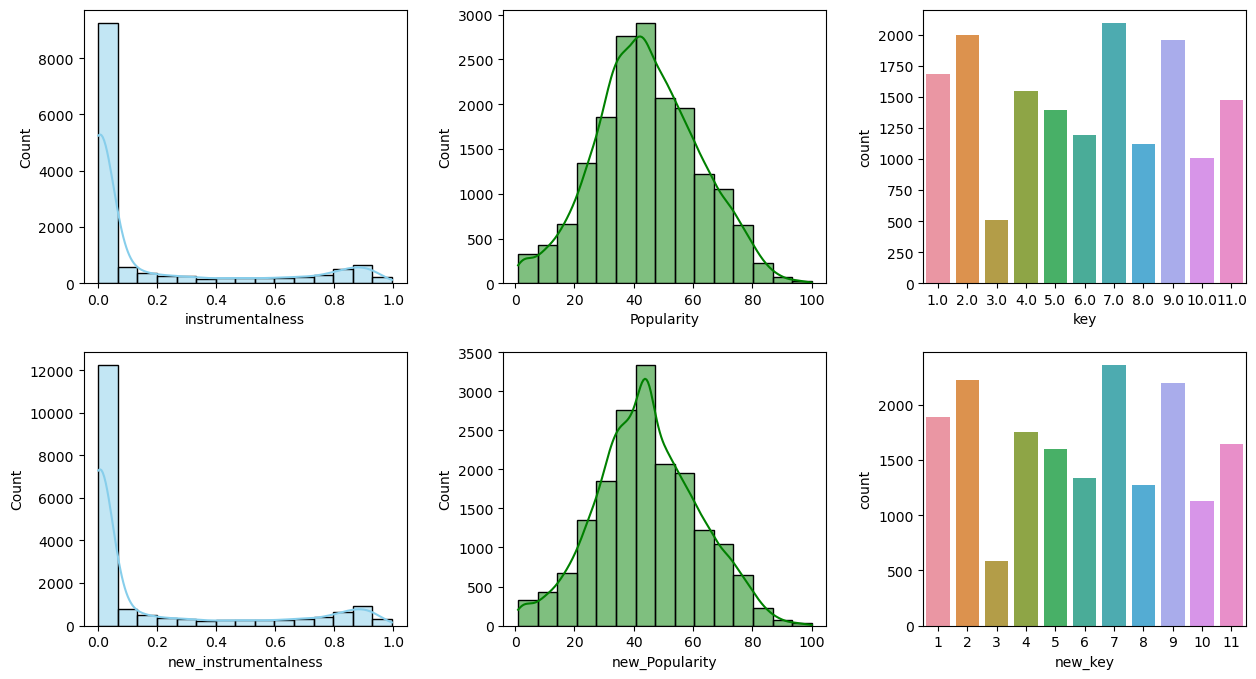

In [9]:
fig, axs = plt.subplots(2,3, figsize=(15, 8))

bin_count = int(np.ceil(np.log2(len(df)))) #sturges law to figure out appropiate bin count

sns.histplot(data=df, x="instrumentalness", kde=True, color="skyblue", ax=axs[0, 0], bins = bin_count)
sns.histplot(data=df, x="new_instrumentalness", kde=True, color="skyblue", ax=axs[1, 0], bins = bin_count)

sns.histplot(data=df, x="Popularity", kde=True, color="green", ax=axs[0, 1], bins = bin_count)
sns.histplot(data=df, x="new_Popularity", kde=True, color="green", ax=axs[1, 1], bins = bin_count)

sns.countplot(data=df, x="key", ax=axs[0, 2])
sns.countplot(data=df, x="new_key", ax=axs[1, 2])

fig.subplots_adjust(wspace=0.3, hspace=0.25)


In [10]:
df.info() #Show the changes that were made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Artist Name           17996 non-null  object 
 1   Track Name            17996 non-null  object 
 2   Popularity            17568 non-null  float64
 3   danceability          17996 non-null  float64
 4   energy                17996 non-null  float64
 5   key                   15982 non-null  float64
 6   loudness              17996 non-null  float64
 7   mode                  17996 non-null  int64  
 8   speechiness           17996 non-null  float64
 9   acousticness          17996 non-null  float64
 10  instrumentalness      13619 non-null  float64
 11  liveness              17996 non-null  float64
 12  valence               17996 non-null  float64
 13  tempo                 17996 non-null  float64
 14  duration_in min/ms    17996 non-null  float64
 15  time_signature     

Como podemos ver, todas las columnas tienen 17996 datos no nulos

### Creando nueva clase de Género
Al estar codificada la variable "Class" en números del 1 al 10 es necesario interpretar los números con respecto a cada uno de los géneros musicales. En Base a la tabla proporcionada se crea una nueva variable llamada "Genre" que representa explicítamente el género al que pertenece cada canción.

In [11]:
#Create a function that relates the numerical values of class to its corresponding genre
def class_to_genre(row):
    if row == 0:
        return 'Acoustic/Folk'
    elif row == 1:
        return 'Alternative'
    elif row == 2:
       return 'Blues'
    elif row == 3:
       return 'Bollywood'
    elif row == 4:
       return 'Country'
    elif row == 5:
        return 'Hip-Hop'
    elif row == 6:
       return 'Indie'
    elif row == 7:
        return 'Instrumental'
    elif row == 8:
        return 'Metal'
    elif row == 9:
        return 'Pop'
    elif row == 10:
        return 'Rock'

df['Genre'] = df['Class'].apply(class_to_genre)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_in min/ms,time_signature,Class,new_instrumentalness,new_Popularity,new_key,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,...,0.0849,0.8990,134.071,234596.0,4,5,0.177562,60.0,1,Hip-Hop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,...,0.1010,0.5690,116.454,251733.0,4,10,0.004010,54.0,3,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,...,0.3940,0.7870,147.681,109667.0,4,6,0.000196,35.0,6,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,...,0.1220,0.5690,107.033,173968.0,4,5,0.000196,66.0,10,Hip-Hop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,...,0.1720,0.0918,199.060,229960.0,4,10,0.016100,53.0,2,Rock


### New class Key
Similar al proceso anterior, decodificamos el atributo 'key' de los registros donde el 0.0 recibe el la calsificación de C, 1.0 de C#, ... y 11.0 de B. dentro de una nueva variable categórica 'Key'.

In [12]:
def class_to_Key(row):
    if row == 0.0:
        return 'C'
    elif row == 1.0:
        return 'C#'
    elif row == 2.0:
       return 'D'
    elif row == 3.0:
       return 'D#'
    elif row == 4.0:
       return 'E'
    elif row == 5.0:
        return 'F'
    elif row == 6.0:
       return 'F#'
    elif row == 7.0:
        return 'G'
    elif row == 8.0:
        return 'G#'
    elif row == 9.0:
        return 'A'
    elif row == 10.0:
        return 'A#'
    elif row == 11.0:
        return 'B'

df['Key'] = df['key'].apply(class_to_Key)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_in min/ms,time_signature,Class,new_instrumentalness,new_Popularity,new_key,Genre,Key
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,...,0.8990,134.071,234596.0,4,5,0.177562,60.0,1,Hip-Hop,C#
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,...,0.5690,116.454,251733.0,4,10,0.004010,54.0,3,Rock,D#
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,...,0.7870,147.681,109667.0,4,6,0.000196,35.0,6,Indie,F#
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,...,0.5690,107.033,173968.0,4,5,0.000196,66.0,10,Hip-Hop,A#
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,...,0.0918,199.060,229960.0,4,10,0.016100,53.0,2,Rock,D


### Histogramas
En esta parte analizaremos el atributo de duración en las canciones. Se nota que los datos es tan en min/ms es por ello que se debe hacer el ajuste necesario para mejor comprender los datos.

<Axes: xlabel='duration_in min/ms', ylabel='Count'>

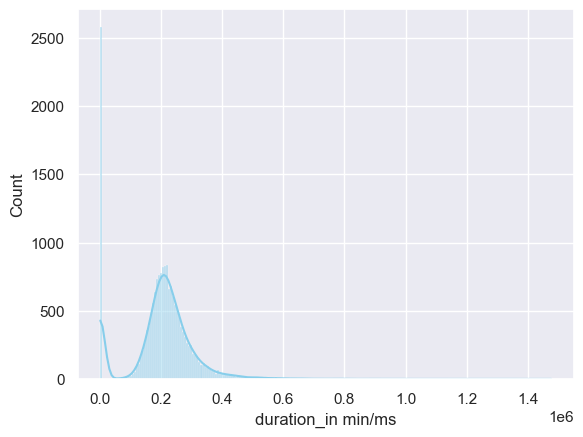

In [13]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="duration_in min/ms", kde=True, color="skyblue")

Al revisar la gráfica  se observa una gran cantidad de datos en la duración 3 min, al corroborar con la base de datos se encontró que algunas canciones estaban en minutos mientras que otras estaban escritas como milisegundos. Por lo tanto se comprueba la medida de la duración en cada una de las canciones, aquellas con valores menores a 100 se multiplican por 60000 para convertirlos a minutos. Una vez se tiene todos los datos de la duración en minutos se vuelve a generar un histograma de la misma variable con los datos correctamente medidos.

In [14]:
condition = df['duration_in min/ms'] < 100 #condicion que discrimina los datos con nuestra medida incorrecta

df.loc[condition, 'duration_in min/ms']=df.loc[condition, 'duration_in min/ms']*60000
df['duration_min'] = df['duration_in min/ms']/60000

Con el fin de observar la distribución de frecuencias del tiempo correcta en cada una de las canciones se genera un histograma de la variable "duration_min" ya corregida.

<Axes: xlabel='duration_min', ylabel='Count'>

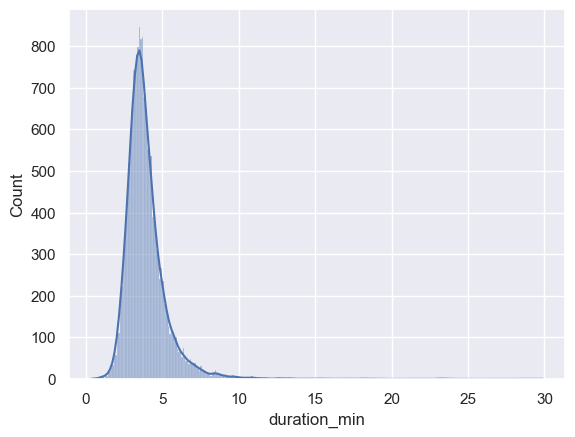

In [15]:
sns.histplot(data=df,x="duration_min", kde=True)

In [16]:
df['duration_min'].describe()

count    17996.000000
mean         3.930388
std          1.427917
min          0.388667
25%          3.127496
50%          3.666667
75%          4.384704
max         29.886000
Name: duration_min, dtype: float64

Se observa que al generar esta nueva columna de datos que describe la duracion en minutos de las canciones resalta que la maxima de los datos es de 29.89 mientras la media es de 3.93 con una std de 1.42.
Por lo tanto seria importante hacer un analisis para determinar si todos los datos son relevantes para el analisis ya que existen valores extraordinarios.

In [17]:
condition = df['duration_min'] > 10

# Count the number of instances (True values) in the condition
count = len(df.loc[condition])

print("Numero de canciones por encima del 99%:", count)

Numero de canciones por encima del 99%: 98


### Nueva variable "collab"
Aquí creamos una nueva variable booleana 'collab' donde 1 significa que la canción es una colaboración entre artistas y 0 es que no lo es. Para hacer esto definimos que hay dos posible casos que indiquen esto: cuando la canción tiene una ',' en el atributo 'Artist Name' o cuando contiene la palabra 'feat.' dentro de 'Track Name'. En total encontramos 1202 canciones con colaboración.


In [18]:
df['collab'] = df['Artist Name'].str.contains(',') + df['Track Name'].str.contains('feat.')
df['collab']

0         True
1        False
2        False
3         True
4        False
         ...  
17991    False
17992    False
17993    False
17994    False
17995    False
Name: collab, Length: 17996, dtype: bool

# **Fase 2. Exploración de los datos**
En esta fase desarrollaremos análisis estadísticos poco más complicados que en la fase anterior enfocándonos más en la distribución de los atributos, sus caracterísiticas. Adicionalmente realizaremos un radar chart para conocer las características de las 10 canciones más escuchadas en nuestra base de datos


In [19]:
df2=df[['new_Popularity','danceability','energy', 'mode','loudness','speechiness','acousticness','new_instrumentalness','liveness','valence','tempo','duration_min']]
df2.head()

,new_Popularity,danceability,energy,mode,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
0,60.0,0.854,0.564,1,-4.964,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,3.909933
1,54.0,0.382,0.814,1,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550
2,35.0,0.434,0.614,1,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783
3,66.0,0.853,0.597,0,-6.528,0.0555,0.021200,0.000196,0.1220,0.5690,107.033,2.899467
4,53.0,0.167,0.975,1,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667


Estos serán las variables cuantitativas que se usaran para el análisis de estadística descriptiva.

### Correlation Heatmap
En cuanto a la visualización de la matriz de correlación que tienen entre las variables de "Popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo" y "duration_in min", y se produce un mapa de calor con el fin de encontrar alguna relación entre "Popularity" y las demas variables.


<Axes: >

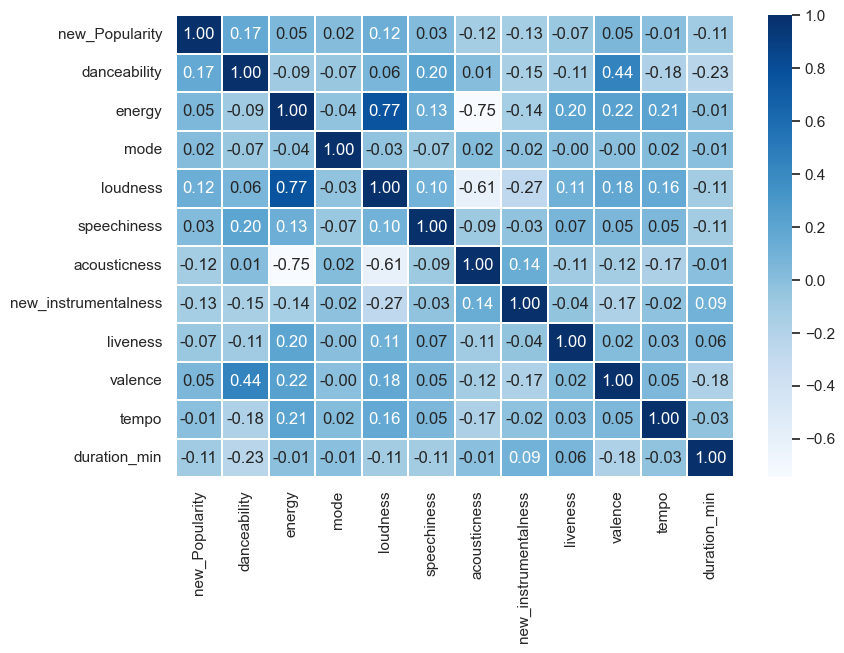

In [20]:
fig, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(data = df2.corr(), cmap ='Blues', linewidths = 0.30, annot =True,fmt='.2f')

Se denotan la variables "loudness" y "energy" con una relacion positiva moderadamente fuerte de 0.77 que nos indica entre más ruidosa la canción la energia de ella suele aumentar también. Seguida por "valence" y "danceability" con una relación moderademente debil de 0.44. Por otro lado, "acousticness" y "energy" tienen una relación negativa moderadamente fuerte lo que sugiere que entre más acústica menos energía en la canción.
Además, la variable "Popularity" tiene relaciones muy poco significativas o neutras con las demás variables cuantitativas.

### Boxplot
Con el objetivo de ver la relación que tienen el género de las canciones con su popularidad se genera un boxplot. En el eje horizontal de la visualización se representa la popularidad de las canciones, mientras que en el eje vertical se observan cada una de las categorías de género.

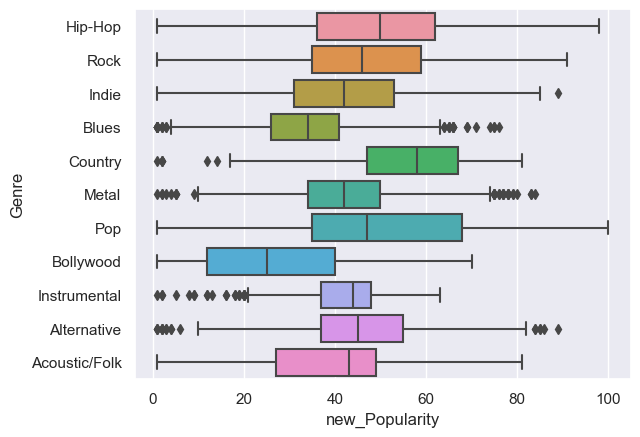

In [21]:
sns.boxplot(x=df['new_Popularity'],y=df['Genre']) #Distribución de popularidad por Género musical
plt.show()

Esta gráfica presenta información acerca del rango intercuartil, la mediana, la cual indica la variabilidad en la popularidad dentro de cada género, así como los valores atípicos. Al examinar los datos proporcionados por el boxplot se resalta que el género "Country" tiende a ser más popular, pues presenta una mediana más alta que el resto, mientras que "Indie" y "Alternative" tienen canciones excepcionalmente populares. Por otro lado, el género con menor popularidad es el de "Bollywood" con una mediana menor.

### Worldcloud de artistas
Generamos un Wordcloud de artistas para visualizar las palabras más recurridas.

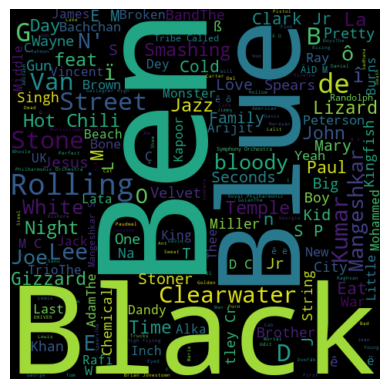

In [22]:
# Create the wordcloud object
artist_array = ''.join(df['Artist Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(artist_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
#sns.violinplot(x=df["species"], y=df["sepal_length"])

Palabras más comunes en los nombres de artistas, resalta "Ben", "Blue", "Black", "Rolling", entre otros.

### Worldcloud de nombres de canciones
De misma manera se generó un wordcloud para los nombres de canciones y buscamos por patrones o relaciones.

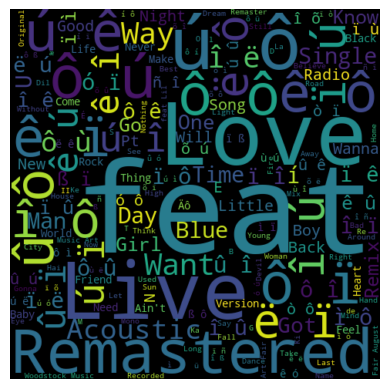

In [23]:
# Create the wordcloud object
track_array = ''.join(df['Track Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(track_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Palabras más comunes en nombres de canciones, resaltan feat, Love ,remastered y live. A su vez, ecnontramos caracteres inusuales que corresponden en buena parte a los datos irrelevantes dentro de la columna

### Comparativo entre "Popularity"y "Genre"
Se realizaron histogramas de la popularidad de cada género con fin de visualizar la popularidad de cada uno en la musica.

C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Popularity count per Genre')

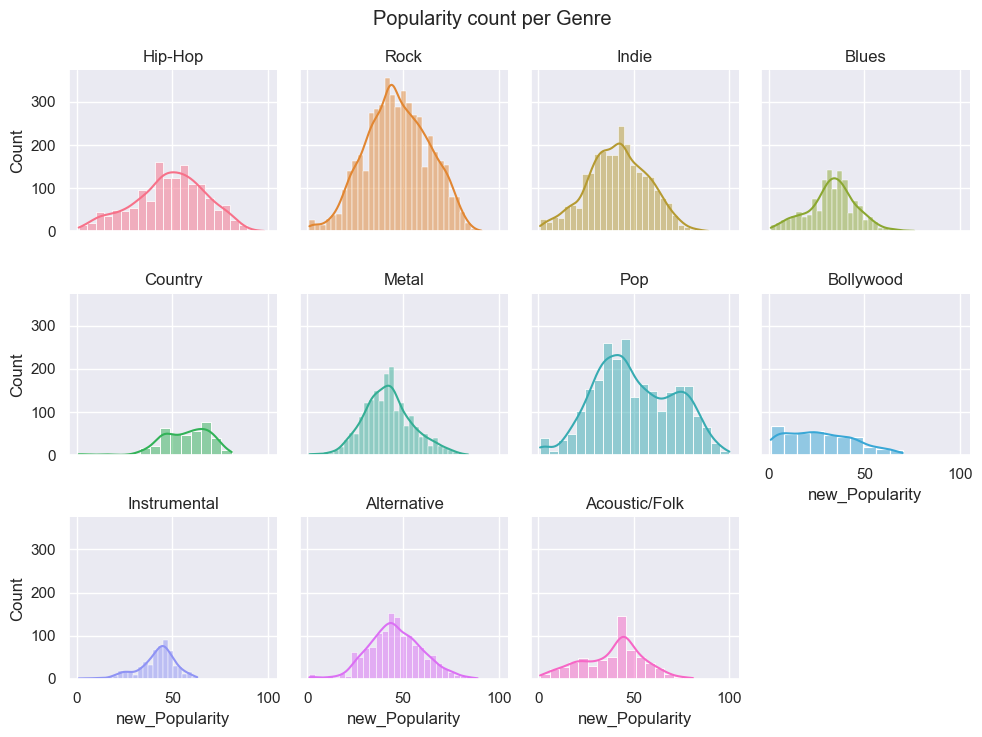

In [24]:
g = sns.FacetGrid(df, col='Genre',hue = 'Genre', col_wrap=4, height=2.5)
g.map(sns.histplot,'new_Popularity', kde = True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Popularity count per Genre')



En el gráfico anterior, se puede observar las diferencias de popularidad, según cada género musical, siendo rock, pop, Indie y Metal los más populares. Además la linea suave en cada diagrama, ayuda a darnos una idea de la forma en que están distribuidos los datos en cada género,siendo la forma más popular la de una distribución normal

### Estadística básica de las variables relevantes

In [25]:
#Pairplot with the most relevant or significant variables
'''
df3=df[['new_Popularity','danceability','energy', 'mode','loudness','liveness','duration_in min/ms']]
g = sns.pairplot(df3, kind="reg", diag_kind = 'kde',height=2,corner = True, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#makes the lower half have a sort of heat map density
g.map_lower(sns.kdeplot, color=".2",levels=5)
plt.show()
'''

'\ndf3=df[[\'new_Popularity\',\'danceability\',\'energy\', \'mode\',\'loudness\',\'liveness\',\'duration_in min/ms\']]\ng = sns.pairplot(df3, kind="reg", diag_kind = \'kde\',height=2,corner = True, plot_kws={\'line_kws\':{\'color\':\'red\'}, \'scatter_kws\': {\'alpha\': 0.1}})\n#makes the lower half have a sort of heat map density\ng.map_lower(sns.kdeplot, color=".2",levels=5)\nplt.show()\n'

* Selección de Variables: Se eligieron específicamente 'new_Popularity', 'danceability', 'energy', 'loudness', 'liveness' y 'duration_in min/ms' para explorar sus relaciones.

* Líneas de Regresión y Scatter Plots: Las líneas rojas en los gráficos de dispersión indican las tendencias lineales entre las variables. Observa la dirección y pendiente de estas líneas para inferir la dirección y fuerza de las relaciones.

* Densidad Kernel en la Diagonal Principal: Los gráficos de densidad kernel en la diagonal principal ofrecen una visión de la distribución univariante de cada variable.

* Mapa de Calor de Densidad: En la mitad inferior, se utiliza un mapa de calor de densidad para resaltar áreas de alta densidad de puntos, proporcionando información adicional sobre las concentraciones de observaciones.

Algo interesante que se puede observar es que todas las variables demuestran tener una fuerte relación con la variable de duracion, las concentraciones de datos están muy cerca de la línea de regresión, lo que significa que existe una correlación fuerte

### Bar Plot de "Genre"
Con el fin de comparar los géneros de música, a
se representa su frecuencia dentro de los datos por medio de un diagrama de barras. Además se incluye la descripción de sus porcentajes.

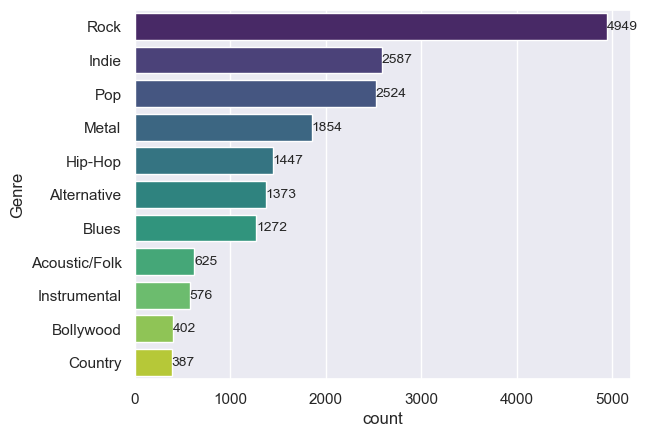

In [26]:
ax = sns.countplot(y = 'Genre', data = df, palette = 'viridis', order = df['Genre'].value_counts().index)
for bars in ax.containers:
  ax.bar_label(bars,size= 10)

In [27]:
df['Genre'].value_counts(normalize=True)

Genre
Rock             0.275006
Indie            0.143754
Pop              0.140253
Metal            0.103023
Hip-Hop          0.080407
Alternative      0.076295
Blues            0.070682
Acoustic/Folk    0.034730
Instrumental     0.032007
Bollywood        0.022338
Country          0.021505
Name: proportion, dtype: float64

Tras analizar los resultados, se observa que el género "Rock" es aquel que sobresale, acumulando 4949 canciones, el equivalente al 27% del total. Es seguido por "Indie", "Pop", "Metal", etc.

In [28]:
#Estadística Básica
columnas_numericas = df2.select_dtypes(include=[int, float])

#Coeficiente de asimetria
coeficiente_asimetria_dict = {}

for i in columnas_numericas.columns:
    coeficiente = columnas_numericas[i].skew()
    coeficiente_asimetria_dict[i] = coeficiente

print(f"coeficiente de asimetría: {coeficiente_asimetria_dict}")

#Coeficiente de variación (%)
coeficiente_variacion_dict = {}

for i in columnas_numericas.columns:
    media = columnas_numericas[i].mean()
    desviacion_estandar = columnas_numericas[i].std()
    coeficiente_variacion = (desviacion_estandar / media) * 100
    coeficiente_variacion_dict[i] = coeficiente_variacion

print(f"coeficiente de variación: {coeficiente_variacion_dict}")

coeficiente de asimetría: {'new_Popularity': 0.07662169457966905, 'danceability': -0.08352192347287282, 'energy': -0.6611691117532402, 'mode': -0.5687418793933883, 'loudness': -1.7613834605630743, 'speechiness': 3.088002356652607, 'acousticness': 1.1054970459533517, 'new_instrumentalness': 1.5257937663230359, 'liveness': 2.176072140966749, 'valence': 0.08992812736275954, 'tempo': 0.37961889582629255, 'duration_min': 4.028886798341066}
coeficiente de variación: {'new_Popularity': 38.682575651712575, 'danceability': 30.595935969574086, 'energy': 35.51322160007694, 'mode': 75.53147216805056, 'loudness': -51.186008881905764, 'speechiness': 104.85411233918518, 'acousticness': 125.72046929178278, 'new_instrumentalness': 171.13801210900107, 'liveness': 81.16008924316812, 'valence': 49.40169900331516, 'tempo': 24.115750260034265, 'duration_min': 36.33018289729258}


In [29]:
#bs = columnas_numericas.describe()
bs = columnas_numericas.describe()
bs.loc["Mode"] = [df['new_Popularity'].mode()[0],df['danceability'].mode()[0],df['energy'].mode()[0], df['mode'].mode()[0],df['loudness'].mode()[0],df['speechiness'].mode()[0],df['acousticness'].mode()[0],df['new_instrumentalness'].mode()[0],df['liveness'].mode()[0],df['valence'].mode()[0],df['tempo'].mode()[0],df['duration_in min/ms'].mode()[0]]
bs.loc["Variance"] = [df['new_Popularity'].var(),df['danceability'].var(),df['energy'].var(), df['mode'].var(),df['loudness'].var(),df['speechiness'].var(),df['acousticness'].var(),df['new_instrumentalness'].var(),df['liveness'].var(),df['valence'].var(),df['tempo'].var(),df['duration_in min/ms'].var()]
IQR = [bs.iat[6, 0]-bs.iat[4, 0]
       ,bs.iat[6, 1]-bs.iat[4, 1]
       ,bs.iat[6, 2]-bs.iat[4, 2]
       ,bs.iat[6, 3]-bs.iat[4, 3]
       ,bs.iat[6, 4]-bs.iat[4, 4]
       ,bs.iat[6, 5]-bs.iat[4, 5]
       ,bs.iat[6, 6]-bs.iat[4, 6]
       ,bs.iat[6, 7]-bs.iat[4, 7]
       ,bs.iat[6, 8]-bs.iat[4, 8]
       ,bs.iat[6, 9]-bs.iat[4, 9]
       ,bs.iat[6, 10]-bs.iat[4, 10]
       ,bs.iat[6, 11]-bs.iat[4, 11]]
bs.loc["IQR"] = IQR
rango = [bs.iat[7, 0]-bs.iat[3, 0]
       ,bs.iat[7, 1]-bs.iat[3, 1]
       ,bs.iat[7, 2]-bs.iat[3, 2]
       ,bs.iat[7, 3]-bs.iat[3, 3]
       ,bs.iat[7, 4]-bs.iat[3, 4]
       ,bs.iat[7, 5]-bs.iat[3, 5]
       ,bs.iat[7, 6]-bs.iat[3, 6]
       ,bs.iat[7, 7]-bs.iat[3, 7]
       ,bs.iat[7, 8]-bs.iat[3, 8]
       ,bs.iat[7, 9]-bs.iat[3, 9]
       ,bs.iat[7, 10]-bs.iat[3, 10]
       ,bs.iat[7, 11]-bs.iat[3, 11]]
bs.loc["Range"] = rango
bs.loc["Kurtosis"] = [df['new_Popularity'].kurtosis(),df['danceability'].kurtosis(),df['energy'].kurtosis(), df['mode'].kurtosis(),df['loudness'].kurtosis(),df['speechiness'].kurtosis(),df['acousticness'].kurtosis(),df['new_instrumentalness'].kurtosis(),df['liveness'].kurtosis(),df['valence'].kurtosis(),df['tempo'].kurtosis(),df['duration_in min/ms'].kurtosis()]
bs




,new_Popularity,danceability,energy,mode,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04
mean,44.512124,0.543433,0.662777,0.636753,-7.910660,0.079707,0.247082,0.177977,0.196170,0.486208,122.623294,3.930388e+00
std,17.218436,0.166268,0.235373,0.480949,4.049151,0.083576,0.310632,0.304586,0.159212,0.240195,29.571527,1.427917e+00
min,1.000000,0.059600,0.000020,0.000000,-39.952000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,3.886667e-01
25%,33.000000,0.432000,0.509000,0.000000,-9.538000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,3.127496e+00
50%,44.000000,0.545000,0.700000,1.000000,-7.016000,0.047400,0.081400,0.003870,0.129000,0.481000,120.065500,3.666667e+00
75%,56.000000,0.659000,0.860000,1.000000,-5.189000,0.083000,0.434000,0.199000,0.258000,0.672000,141.969250,4.384704e+00
max,100.000000,0.989000,1.000000,1.000000,1.355000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,2.988600e+01
Mode,42.000000,0.527000,0.872000,1.000000,-5.576000,0.031700,0.102000,0.929000,0.110000,0.389000,119.993000,1.920000e+05
Variance,296.474544,0.027645,0.055401,0.231312,16.395624,0.006985,0.096492,0.092773,0.025348,0.057694,874.475229,7.340211e+09


###Transformación de Box-Cox


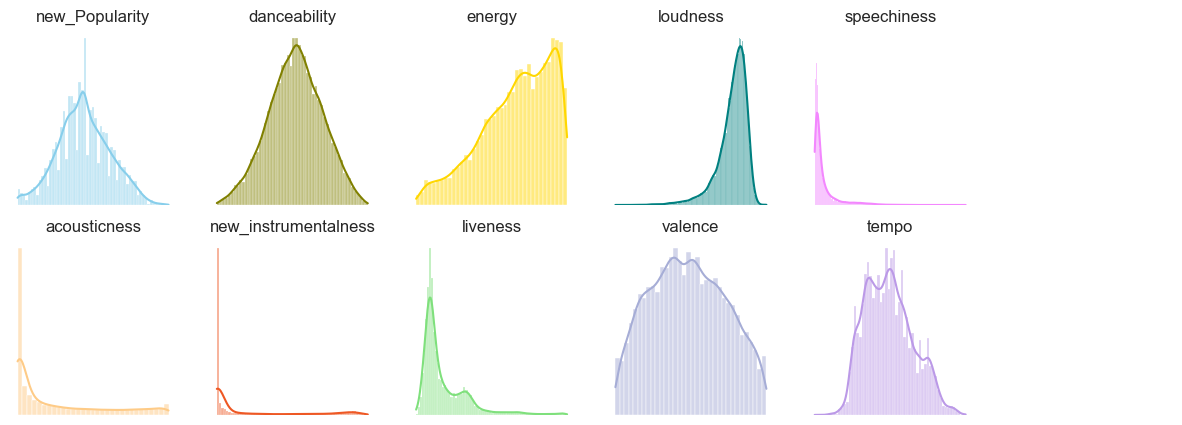

In [30]:
fig, axs = plt.subplots(2,6, figsize=(15, 5))

sns.histplot(data=df2, x="new_Popularity", kde=True, color="skyblue", ax=axs[0, 0]).set_title('new_Popularity')
sns.histplot(data=df2, x="danceability", kde=True, color="olive", ax=axs[0, 1]).set_title('danceability')
sns.histplot(data=df2, x="energy", kde=True, color="gold", ax=axs[0, 2]).set_title('energy')
sns.histplot(data=df2, x="loudness", kde=True, color="teal", ax=axs[0, 3]).set_title('loudness')
sns.histplot(data=df2, x="speechiness", kde=True, color="#F387FE", ax=axs[0, 4]).set_title('speechiness')
sns.histplot(data=df2, x="acousticness", kde=True, color="#FECB87", ax=axs[1, 0]).set_title('acousticness')
sns.histplot(data=df2, x="new_instrumentalness", kde=True, color="#EE5824", ax=axs[1, 1]).set_title('new_instrumentalness')
sns.histplot(data=df2, x="liveness", kde=True, color="#7FE07C", ax=axs[1, 2]).set_title('liveness')
sns.histplot(data=df2, x="valence", kde=True, color="#A6ADD6", ax=axs[1, 3]).set_title('valence')
sns.histplot(data=df2, x="tempo", kde=True, color="#BB99E7", ax=axs[1, 4]).set_title('tempo')

for ax in axs.flat:
    ax.label_outer()

axs = axs.flatten()
for ax in axs:
    ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

plt.xticks(visible=False)

plt.show()


Las variables de 'loudness', 'speechiness', 'acousticness', 'new_instrumentalness' y 'liveness' son las principales variables que presentan un exceso de sesgo, algunos hacia la izquierda, algunos hacia de la derecha.

La transformación de Box-Cox puede tratar con el sesgo de los datos, esta transformación nos puede ayudar a estabilizar las varianzas de los datos para asemejar más su distribución a una normal. Este metodo será util más adelante ya que utiizaremos métodos estadísticos en los que se asume la normalidad de los datos

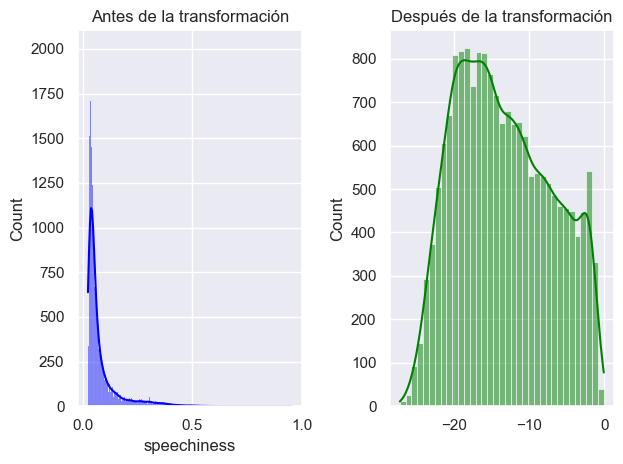

In [44]:

data_speechiness, lambda_speechiness = st.boxcox(df['speechiness'])

# Histograma antes de la transformación
plt.subplot(1, 2, 1)
sns.histplot(df['speechiness'], kde=True, color='blue')
plt.title('Antes de la transformación')

# Histograma después de la transformación
plt.subplot(1, 2, 2)
sns.histplot(data_speechiness, kde=True, color='green')
plt.title('Después de la transformación')

plt.tight_layout()
plt.show()



Se optó por aplicar la transformación a la variable 'speechiness' debido a su marcado sesgo hacia la izquierda. Todos los valores de esta variable son mayores a cero, lo que la hace adecuada para la transformación de Box-Cox.

En los resultados se observa el cambio en el sesgo, aunque no se ha alcanzado una distribución normal perfecta, la variable ahora es más facil de manipular y trabajar con ella al aporximarse a una distribución normal.

### test de Grubbs




Con el objetivo de encontrar valores atípicos en los datos presentados se busca realizar un Test de Grubbs, el cual tiene la finalidad de encontrar un valor atípico en aquellos datos que tienen una distribución normal. Es por esto que se aplica esta prueba aquellos datos que se observan que tienen una distribución normal o parecida como es el caso de "speechiness", "liveness" y "duration_in min/ms"

In [47]:
#!pip install outlier_utils
from outliers import smirnov_grubbs as grubbs

###"speechiness"

In [48]:
grubbs.test(df["speechiness"], alpha=.05) #array sin valores atípicos

0        0.0485
1        0.0406
2        0.0525
3        0.0555
4        0.2160
          ...  
17991    0.0413
17992    0.0329
17993    0.0712
17994    0.1340
17995    0.0591
Name: speechiness, Length: 17757, dtype: float64

In [49]:
grubbs.max_test_indices(df["speechiness"], alpha=.05)

[11358, 1301]

In [50]:
grubbs.max_test_outliers(df["speechiness"],alpha=.05)

[0.955, 0.937]

###"liveness"

In [51]:
grubbs.test(df["liveness"], alpha=.05)

0        0.0849
1        0.1010
2        0.3940
3        0.1220
4        0.1720
          ...  
17991    0.0984
17992    0.0705
17993    0.6660
17994    0.2560
17995    0.3340
Name: liveness, Length: 17800, dtype: float64

In [52]:
grubbs.max_test_indices(df["liveness"], alpha=.05)

[13405, 460]

In [53]:
grubbs.max_test_outliers(df["liveness"],alpha=.05)

[1.0, 0.992]

###"duration_min"

In [54]:
grubbs.test(df["duration_min"], alpha=.05)

0        3.909933
1        4.195550
2        1.827783
3        2.899467
4        3.832667
           ...   
17991    3.224167
17992    4.284450
17993    3.603700
17994    3.661550
17995    3.037117
Name: duration_min, Length: 17852, dtype: float64

In [55]:
grubbs.max_test_indices(df["duration_min"], alpha=.05)

[14934, 1219]

In [56]:
grubbs.max_test_outliers(df["duration_min"],alpha=.05)

[29.886, 29.45]

Una vez instalados los paquetes, se utiliza la función para regresar el arreglo sin los datos atípicos. Posteriormente se localizan la posición en la que se encuentran, por último, regresan los valores atípicos. En el caso de la variable "speechiness" son 0.995 y 0.937 que se encuentran en el 11358 y 1301 respectivamente. Por el otro lado, la variable "liveness" tiene dos datos atípicos que son 1.0 y 0.992, localizados en 13405 y 460 respectivamente. Finalmente la varible "duration_in min/ms" tiene  1793160.0 y 1767000.0 como valores atípicos ubicados en 14934 y 1219.

In [57]:
df2.describe()

,new_Popularity,danceability,energy,mode,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,0.636753,-7.910660,0.079707,0.247082,0.177977,0.196170,0.486208,122.623294,3.930388
std,17.218436,0.166268,0.235373,0.480949,4.049151,0.083576,0.310632,0.304586,0.159212,0.240195,29.571527,1.427917
min,1.000000,0.059600,0.000020,0.000000,-39.952000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,0.388667
25%,33.000000,0.432000,0.509000,0.000000,-9.538000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,3.127496
50%,44.000000,0.545000,0.700000,1.000000,-7.016000,0.047400,0.081400,0.003870,0.129000,0.481000,120.065500,3.666667
75%,56.000000,0.659000,0.860000,1.000000,-5.189000,0.083000,0.434000,0.199000,0.258000,0.672000,141.969250,4.384704
max,100.000000,0.989000,1.000000,1.000000,1.355000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,29.886000


 Radar Chart of Top 10 popular songs

# Fase 3
## Análisis estadístico
En esta fase del análisis, se modelaran las variables de interés con distribuciones de probabilidad. Este proceso permitirá entender mejor las variables y proporcionará un marco para realizar predicciones y cálculos de probabilidad. Se revisarán los análisis anteriores para generar hipótesis sobre qué distribuciones de probabilidad podrían modelar adecuadamente las variables, además de estimar los parámetros de las distribuciones seleccionadas por medio del método de máxima verosimilitud. Todo esto para explorar la utilidad de los modelos de probabilidad en la comprensión y predicción de las variables clave.

In [58]:
df2.head()

,new_Popularity,danceability,energy,mode,loudness,speechiness,acousticness,new_instrumentalness,liveness,valence,tempo,duration_min
0,60.0,0.854,0.564,1,-4.964,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,3.909933
1,54.0,0.382,0.814,1,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550
2,35.0,0.434,0.614,1,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783
3,66.0,0.853,0.597,0,-6.528,0.0555,0.021200,0.000196,0.1220,0.5690,107.033,2.899467
4,53.0,0.167,0.975,1,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667


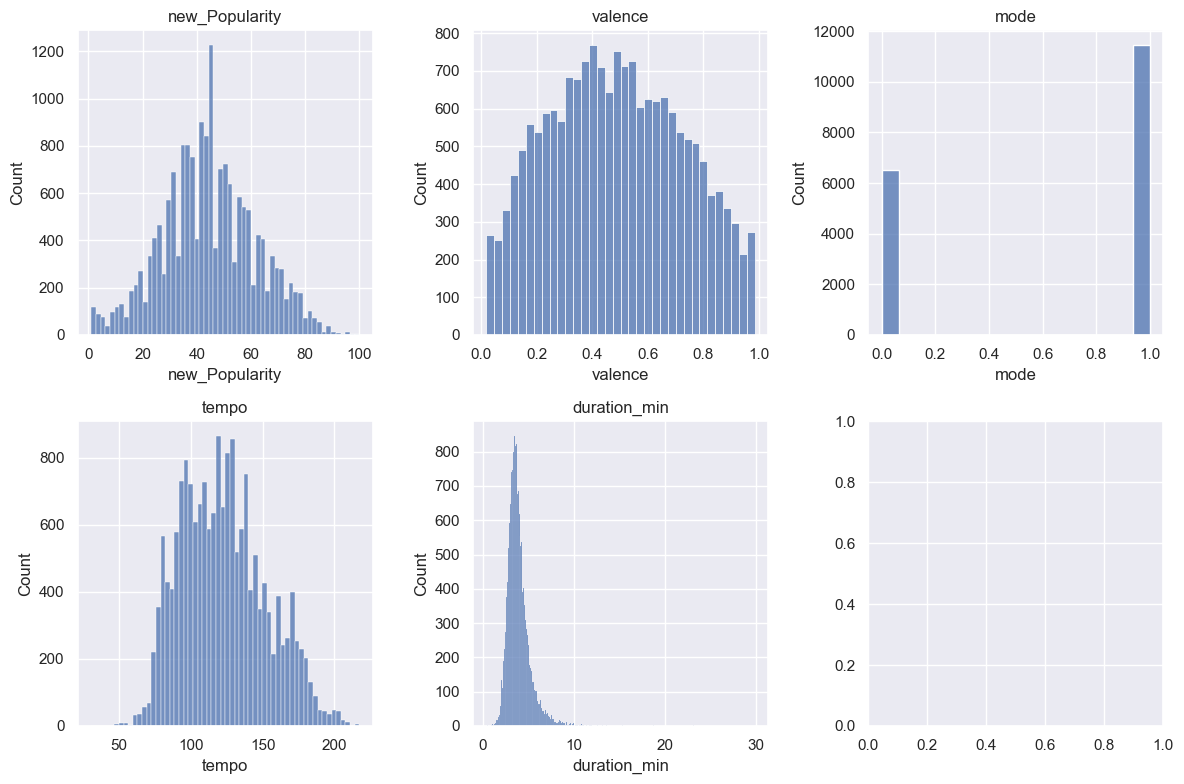

In [59]:
#  Determina qué distribución de probabilidad sería adecuada para modelar la popularidad, el modo, la valence, el tempo y la duración de las canciones.
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Histograma 1
sns.histplot(data=df2, x="new_Popularity", ax=axs[0, 0])
axs[0, 0].set_title('new_Popularity')

# Histograma 2
sns.histplot(data=df2, x="valence", ax=axs[0, 1])
axs[0, 1].set_title('valence')

# Histograma 3
sns.histplot(data=df2, x="tempo", ax=axs[1, 0])
axs[1, 0].set_title('tempo')

# Histograma 4
sns.histplot(data=df2, x="duration_min", ax=axs[1, 1])
axs[1, 1].set_title('duration_min')

# Histograma 5
sns.histplot(data=df2, x="mode", ax=axs[0, 2])
axs[0, 2].set_title('mode')

plt.tight_layout()
plt.show()

Se puede observar que las variables como mode no son apropiadas ya que no siguen una distrubicion de forma continua. Sin embargo, las demas se utilizaran para el analisis

###Parámetros de las distribuciones
Si queremos generar una función de densidad de probabilidad, necesitamos encontrar los parámetros que rigen la distribución.

In [60]:
#Determinar funciones de probabilidad
#!pip install distfit
st.lognorm.fit(df['new_Popularity'])

(0.02805819545245084, -569.0506846235184, 613.3213442951189)

###Prueba Kolmogorov-Smirnov
A partir de los histrogramas, podemos suponer que todos los atributos anteriores tienen una distribución normal (menos 'mode'). Para confirmar esto, haremos una prueba de hipótesis usando la prueba de Kolmogorov-Smirnov. Esta prueba de hipotesis plantea la hipotesis nula de que la distribución standard normal y la distribución de los datos estandarizados son igual, la hipótesis alternativa al aplicar un test de dos colas es que las distribuciones son diferentes. Aplicaremos este test para los 5 atributos planteando que las 5 son normales, esto con una significancia de 95% empezaremos creando nuevas variables con nuestros atributos estandarizados

In [61]:
popularity_st = st.zscore(df2['new_Popularity'])
valence_st =  st.zscore(df2['valence'])
mode_st = st.zscore(df2['mode'])
tempo_st = st.zscore(df2['tempo'])
duration_st = st.zscore(df2['duration_min'])

Popularidad

In [62]:
st.kstest(popularity_st, st.norm.cdf)

KstestResult(statistic=0.04154244727335321, pvalue=2.0098661231801622e-27, statistic_location=0.028335281678229258, statistic_sign=1)

El p-value<0.05, por lo tanto no rechazamos la hipótesis nula

Valence

In [63]:
st.kstest(valence_st, st.norm.cdf)

KstestResult(statistic=0.036747441775570766, pvalue=1.5011814409593782e-21, statistic_location=-0.683664851039225, statistic_sign=1)

El p-value<0.05, por lo tanto no rechazamos la hipótesis nula

Mode

In [64]:
st.kstest(mode_st, st.norm.cdf)

KstestResult(statistic=0.41171623345633346, pvalue=0.0, statistic_location=0.7552937357610396, statistic_sign=-1)

El p-value<0.05, por lo tanto no rechazamos la hipótesis nula


Tempo

In [65]:
st.kstest(tempo_st, st.norm.cdf)

KstestResult(statistic=0.04756112016209607, pvalue=8.153459079546305e-36, statistic_location=-0.593570345487924, statistic_sign=1)

El p-value<0.05, por lo tanto no rechazamos la hipótesis nula

Duration

In [66]:
st.kstest(duration_st, st.norm.cdf)

KstestResult(statistic=0.12793881482397096, pvalue=2.9683024497366057e-257, statistic_location=0.2681919680364129, statistic_sign=1)

El p-value<0.05, por lo tanto no rechazamos la hipótesis nula